<h3>Парний t-критерій Стьюдента</h3>

Мне показалось, что данные с прошлой лабораторной подходят и для данной работы, так как в них есть результаты 'до' и 'после'. Поэтому будем дальше работать с наркотиками и плацебо. А именно, с влиянием Alprazolam (чаще xanax) на память человека.

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

| Група 1 | Група 2  | 
| ------------- |--------- |
| $k_{1}  $   | $k_{2}$   |
| $...$   | $...$   |
| $k_{1n}$   | $k_{2n}$   |

In [8]:
import pandas as pd
import seaborn as sns
from math import sqrt

drugged_memory_test = pd.read_csv('Islander_data.csv')
drugged_memory_test.tail()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2
197,Chloe,Takahashi,32,S,3,T,43.1,42.1,-1.0


In [5]:
table = pd.DataFrame(columns = ["Before", "After"], index = [i for i in range(len(drugged_memory_test))])
table["Before"] = drugged_memory_test["Mem_Score_Before"]
table["After"] = drugged_memory_test["Mem_Score_After"]

table

,Before,After
0,63.5,61.2
1,41.6,40.7
2,59.7,55.1
3,51.7,51.2
4,47.0,47.1
...,...,...
193,71.3,74.3
194,72.5,70.4
195,30.8,33.1
196,53.6,53.8


2. Побудувати графік, що відображає розкид даних в групах.

[Text(0.5, 0, 'Memory sore')]

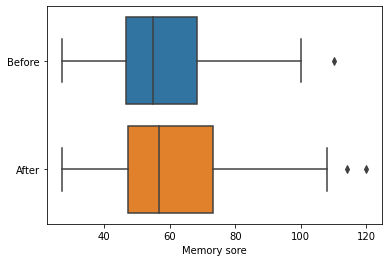

In [6]:
sns.boxplot(data = table, orient='h').set(xlabel="Memory sore")

3. Написати функції:
    * для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

    * для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'язку (significant або not significant). 

In [13]:
def Pearson(table):
    keys = table.keys()
    n = len(table)
    r_numerator = (n*pd.Series(table[keys[0]]*table[keys[1]]).sum())-(pd.Series(table[keys[0]]).sum()*pd.Series(table[keys[1]])).sum()
    r_denominator = sqrt(((n*pd.Series(table[keys[0]]**2).sum())-(pd.Series(table[keys[0]]).sum()**2))*
                         ((n*pd.Series(table[keys[1]]**2).sum())-(pd.Series(table[keys[1]]).sum()**2)))
    r = r_numerator/r_denominator
    df = n-2
    correlation_table = pd.read_excel("Correlation.xlsx")
    r_table = 0
    i = 0
    while ((i < len(correlation_table)-1) and (df > correlation_table.iloc[i,0])):
        r_table = correlation_table.iloc[i,1]
        i += 1
    if (df < correlation_table.iloc[i-1,0]):
        if (abs(df-correlation_table.iloc[i-1,0]) > abs(df-correlation_table.iloc[i,0])):
            r_table = correlation_table.iloc[i,1]
    
    return r, df, "SIGNIFICANT" if abs(r) > r_table else "NOT SIGNIFICANT"

In [17]:
def Student(table):
    keys = table.keys()
    n = len(table)
    mean = (table[keys[0]]-table[keys[1]]).mean()
    std = (table[keys[0]]-table[keys[1]]).std()
    t = (mean/std)*sqrt(n)
    df = n-1
    Student_table = pd.read_excel("Student.xlsx")
    t_table = 0
    i = 0
    while ((i < len(Student_table)-1) and (df > Student_table.iloc[i,0])):
        t_table = Student_table.iloc[i,1]
        i += 1
    if (abs(df-Student_table.iloc[i-1,0]) > abs(df-Student_table.iloc[i,0])):
        t_table = Student_table.iloc[i,1]
    
    return t, df, "SIGNIFICANT" if abs(t) > t_table else "NOT SIGNIFICANT"

4. Перевірити розбіжність на між групами на даних з п. 1. 

In [20]:
Pearson(table)

(0.80752816149054, 196, 'SIGNIFICANT')

Кореляция существует и она значительна.

In [21]:
Student(table)

(-3.8657067402083998, 197, 'SIGNIFICANT')

Значимая связь существует.

5. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

Данные значительно коррелируют, но это ожидаемо, так как тест память проходит один и тот же человек и больших разбросов быть не должно. Так же теперь мы можем сказать, после оценки данных критерием Стьюдента, что связь между употреблением Alprazolam и улучшением памяти существует. На это указывает отрицательное значение ~ -3.9 критерия.